### This code illustrates how to compute the charge cylindrical distribution function for a single $CO_{2}$ molecule in a given trajectory

### Prerequisite:
* p_CDF_calculation.ipynb

### Package Required:
* numpy
* mdtraj
* matplotlib
* xmltodict

#### Note: If you don't have the packages listed above installed, then you can type in the following commands in the terminal
* conda install numpy
* conda install -c conda-forge mdtraj
* conda install matplotlib
* conda install anaconda::xmltodict

### File Required:
* A trajectory file (.h5)

* Note: Here, I use a trajectory that contains only one CO2 molecule as an example (~/pikachu/homes/zhuo/haverford/code_example/BMIM_PF6_CO2_system_eq_step4.h5), but this code can also be used for systems with multiple CO2 molecules.

### The Actual Code:

1. Import the required package

In [1]:
import mdtraj as md
import numpy as np
import xmltodict

2. Load the trajectory file 

In [2]:
traj = md.load_hdf5('BMIM_PF6_CO2_system_eq_step4.h5')
traj

<mdtraj.Trajectory with 10000 frames, 12550 atoms, 513 residues, and unitcells at 0x7f470411f020>

3. Extract some basic information from the trajectory

In [3]:
box_sizes = traj.unitcell_lengths[0]*10 # in \AA
box_sizes

array([44.480778, 44.480778, 44.480778], dtype=float32)

In [4]:
n_frames = traj.n_frames
n_frames

10000

In [5]:
n_atoms = traj.n_atoms
n_atoms

12550

In [6]:
timestep = traj.timestep/1000 # convert ps into ns here
timestep

0.01

4. Find the charge of ionic liquid molecules

Get the atom index for all the IL molecules

In [7]:
topology = traj.topology
BMIM_ILs = [atom.index for atom in topology.atoms if atom.residue.name == "BMIM"] 
PF6_ILs = [atom.index for atom in topology.atoms if atom.residue.name == "PF6"]
ILs = BMIM_ILs + PF6_ILs
ILs

[6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,


Rename the atom name to match the format in the forcefield file

In [8]:
ILs_traj = traj.atom_slice(ILs)
IL_charge_topology = ILs_traj.topology
# join the residue name with atom name e.g. PF6-DF6
implicit_atom_types = [(atom.residue.name +'-'+ atom.name) for atom in IL_charge_topology.atoms]
implicit_atom_types

['BMIM-N1',
 'BMIM-N11',
 'BMIM-C1',
 'BMIM-H1',
 'BMIM-C2',
 'BMIM-H2',
 'BMIM-C21',
 'BMIM-H21',
 'BMIM-C3',
 'BMIM-H3',
 'BMIM-H31',
 'BMIM-H32',
 'BMIM-C4',
 'BMIM-H4',
 'BMIM-H41',
 'BMIM-C5',
 'BMIM-H5',
 'BMIM-H51',
 'BMIM-C51',
 'BMIM-H52',
 'BMIM-H53',
 'BMIM-C6',
 'BMIM-H6',
 'BMIM-H61',
 'BMIM-H62',
 'BMIM-DN1',
 'BMIM-DN11',
 'BMIM-DC1',
 'BMIM-DC2',
 'BMIM-DC21',
 'BMIM-DC3',
 'BMIM-DC4',
 'BMIM-DC5',
 'BMIM-DC51',
 'BMIM-DC6',
 'BMIM-N1',
 'BMIM-N11',
 'BMIM-C1',
 'BMIM-H1',
 'BMIM-C2',
 'BMIM-H2',
 'BMIM-C21',
 'BMIM-H21',
 'BMIM-C3',
 'BMIM-H3',
 'BMIM-H31',
 'BMIM-H32',
 'BMIM-C4',
 'BMIM-H4',
 'BMIM-H41',
 'BMIM-C5',
 'BMIM-H5',
 'BMIM-H51',
 'BMIM-C51',
 'BMIM-H52',
 'BMIM-H53',
 'BMIM-C6',
 'BMIM-H6',
 'BMIM-H61',
 'BMIM-H62',
 'BMIM-DN1',
 'BMIM-DN11',
 'BMIM-DC1',
 'BMIM-DC2',
 'BMIM-DC21',
 'BMIM-DC3',
 'BMIM-DC4',
 'BMIM-DC5',
 'BMIM-DC51',
 'BMIM-DC6',
 'BMIM-N1',
 'BMIM-N11',
 'BMIM-C1',
 'BMIM-H1',
 'BMIM-C2',
 'BMIM-H2',
 'BMIM-C21',
 'BMIM-H21',
 'BMIM-C3',

Find the charge for the selected atoms

In [9]:
Charges = []

forcefield = 'sapt.xml'
with open(forcefield) as fd:
    ff = xmltodict.parse(fd.read())

for c, n in enumerate(implicit_atom_types):
    for k, m in enumerate(ff['ForceField']['NonbondedForce']['Atom']):
        if m['@type'] ==n:
            charges = float(m['@charge'])
            Charges.append(charges)
Charges            

[0.649,
 0.649,
 1.4635,
 0.0918,
 1.1286,
 0.1644,
 1.1286,
 0.1644,
 1.3153,
 0.0328,
 0.0328,
 0.0328,
 1.3178,
 0.0157,
 0.0157,
 1.1454,
 -0.0181,
 -0.0181,
 1.1454,
 -0.0181,
 -0.0181,
 1.0587,
 0.0213,
 0.0213,
 0.0213,
 -0.8404,
 -0.8404,
 -1.1478,
 -1.1478,
 -1.1478,
 -1.0838,
 -1.0838,
 -1.0838,
 -1.0838,
 -1.0838,
 0.649,
 0.649,
 1.4635,
 0.0918,
 1.1286,
 0.1644,
 1.1286,
 0.1644,
 1.3153,
 0.0328,
 0.0328,
 0.0328,
 1.3178,
 0.0157,
 0.0157,
 1.1454,
 -0.0181,
 -0.0181,
 1.1454,
 -0.0181,
 -0.0181,
 1.0587,
 0.0213,
 0.0213,
 0.0213,
 -0.8404,
 -0.8404,
 -1.1478,
 -1.1478,
 -1.1478,
 -1.0838,
 -1.0838,
 -1.0838,
 -1.0838,
 -1.0838,
 0.649,
 0.649,
 1.4635,
 0.0918,
 1.1286,
 0.1644,
 1.1286,
 0.1644,
 1.3153,
 0.0328,
 0.0328,
 0.0328,
 1.3178,
 0.0157,
 0.0157,
 1.1454,
 -0.0181,
 -0.0181,
 1.1454,
 -0.0181,
 -0.0181,
 1.0587,
 0.0213,
 0.0213,
 0.0213,
 -0.8404,
 -0.8404,
 -1.1478,
 -1.1478,
 -1.1478,
 -1.0838,
 -1.0838,
 -1.0838,
 -1.0838,
 -1.0838,
 0.649,
 0.649,
 1.

5. Select the center atom and the z-axis. Here, we are using the carbon atom in CO2 as the center atom and the C=O bond as the z-axis

In [10]:
POI_C = traj.topology.select("name == C")
POI_O = traj.topology.select("element == O")
xyz_carbon = traj.xyz[:,POI_C,:]*10 # in \AA
xyz_oxygen = traj.xyz[:,POI_O,:]*10 # in \AA
xyz_ILs = traj.xyz[:,ILs,:]*10 # in \AA

6. Define the region of interest (ROI)

In [11]:
R_Max = 5  # in \AA
R_Min = 0 # in \AA
Z_Max = 5 # in \AA
Z_Min = -5 # in \AA
r_bins = 50
z_bins = 100 
delta_R = (R_Max - R_Min)/r_bins 
delta_Z = (Z_Max - Z_Min)/z_bins


In [12]:
# Volume for each bin at different r value
pi = np.pi
Volume = np.zeros(r_bins)
r = np.arange(0,R_Max,delta_R)
r_bins

50

In [13]:
for i in np.arange(r_bins):
    Volume[i] = pi*(2*r[i]+delta_R)*delta_R*delta_Z
Volume    

array([0.00314159, 0.00942478, 0.01570796, 0.02199115, 0.02827433,
       0.03455752, 0.0408407 , 0.04712389, 0.05340708, 0.05969026,
       0.06597345, 0.07225663, 0.07853982, 0.084823  , 0.09110619,
       0.09738937, 0.10367256, 0.10995574, 0.11623893, 0.12252211,
       0.1288053 , 0.13508848, 0.14137167, 0.14765485, 0.15393804,
       0.16022123, 0.16650441, 0.1727876 , 0.17907078, 0.18535397,
       0.19163715, 0.19792034, 0.20420352, 0.21048671, 0.21676989,
       0.22305308, 0.22933626, 0.23561945, 0.24190263, 0.24818582,
       0.254469  , 0.26075219, 0.26703538, 0.27331856, 0.27960175,
       0.28588493, 0.29216812, 0.2984513 , 0.30473449, 0.31101767])

7. Define the time separation to look at the dynamic of the atom of interest

In [14]:
time_separation = 0 # in ns

if time_separation == 0:
    frame_separation = 0
elif time_separation < timestep:
    print("The smallest time separation between frames is %d, which is greater than the given input. Try again!" %(timestep)) 
    exit(1)
else:
    frame_separation = int(time_separation/timestep)

frame_separation # the number of frames within the defined time separation  

0

8. Calculate the q-CDF

In [15]:
def vector_pbc(x0,x1,Box):
    """
    calculate vector with periodic boundary condition

    x0 -- initial position
    x1 -- finial position
    Box -- box size
    everything is in 1D, but can be used to calculate multiple dimensions as well
    """

    delta = x1 - x0
    delta= np.where(np.abs(delta) > 0.5 * Box, np.where(delta > 0, np.abs(delta)-Box,Box-np.abs(delta)), delta)
    return delta

In [16]:
rho = np.zeros([r_bins,z_bins]) # Define an empty array rho
i = frame_separation

In [17]:
vector_CO1 = vector_pbc(xyz_carbon[np.arange(0,n_frames-i),:,:],xyz_oxygen[np.arange(0,n_frames-i),:,:],box_sizes) # Compute the C=O vector at time t1
vector_CO2 = vector_pbc(xyz_carbon[np.arange(i,n_frames),:,:],xyz_oxygen[np.arange(i,n_frames),:,:],box_sizes)  # Compute the C=O vector at time t2   
vector_CO1_norm = vector_CO1/np.expand_dims(np.linalg.norm(vector_CO1, axis=-1), 2) # Normalize the vector as a unit vector
vector_CO2_norm = vector_CO2/np.expand_dims(np.linalg.norm(vector_CO2, axis=-1), 2)
vector_CI1 = vector_pbc(xyz_carbon[np.arange(0,n_frames-i),:,:],xyz_ILs[np.arange(0,n_frames-i),:,:],box_sizes) # Compute the CI vector at time t1
vector_CI2 = vector_pbc(xyz_carbon[np.arange(i,n_frames),:,:],xyz_ILs[np.arange(i,n_frames),:,:],box_sizes)  # Compute the CI vector at time t2   

In [18]:
for j in np.arange(vector_CO1.shape[0]):
    for k in range(0,len(POI_O)): 
        z_1 = np.dot(vector_CI1[j],vector_CO1_norm[j][k].T) # Calculate the height 
        z_2 = np.dot(vector_CI2[j],vector_CO2_norm[j][k].T)
        r_1 = np.linalg.norm(vector_CI1[j] - np.expand_dims(z_1,1)*vector_CO1_norm[j][k].T, axis=-1) # calculate the r vector
        r_2 = np.linalg.norm(vector_CI2[j] - np.expand_dims(z_2,1)*vector_CO2_norm[j][k].T, axis=-1)
        for l in range(0,len(z_1)):
            if r_1[l] < R_Max and Z_Min < z_1[l] < Z_Max: # Check if the vectors remain in the ROI throughout the time separation
                if r_2[l] < R_Max and Z_Min < z_2[l] < Z_Max:
                    rho[int(r_1[l]/delta_R), int(z_1[l]/delta_Z+50)] += Charges[l]/Volume[int(r_1[l]/delta_R)] # counting the number of particles within the region and then divide by the associate volume and then divide by the number density of the system
                else:
                    continue
CDF = rho/(n_frames-frame_separation)  
CDF

array([[ 5.85690191e-04,  4.09187359e-02,  5.91419769e-02, ...,
         4.55724264e-02,  4.81220886e-02,  3.41610170e-02],
       [-5.80491129e-03, -2.92059931e-02,  1.82518889e-02, ...,
         1.48056538e-02, -8.45738757e-02, -2.94988382e-02],
       [-1.43984294e-02,  1.23014039e-02,  2.15050159e-03, ...,
         3.10734111e-03,  3.11593548e-02,  1.97816862e-02],
       ...,
       [-8.29281019e-05,  7.94310490e-03,  8.19128609e-04, ...,
         9.01326274e-03, -2.58313499e-03, -2.88154213e-05],
       [-1.46009073e-03, -6.55731492e-03,  4.87699969e-03, ...,
        -6.45506197e-03, -1.77866314e-03,  5.63408499e-04],
       [-5.37364962e-03,  5.25407443e-03, -8.07806186e-03, ...,
         8.40367037e-03,  4.34583022e-03, -3.95398753e-03]])

9. Save the data into .txt file

In [22]:
np.savetxt('BMIM_PF6_CO2_system_eq_step4_CDF_0_ns.txt', CDF,fmt ='%.6f',delimiter = ',', header = 'R, Z')

10. Plotting

In [23]:
import matplotlib.pyplot as plt

Define the plotting range

In [24]:
R, Z = np.mgrid[slice(-R_Max, R_Max+delta_R, delta_R),
                 slice(Z_Min, Z_Max+delta_R, delta_Z)]
R, Z

(array([[-5. , -5. , -5. , ..., -5. , -5. , -5. ],
        [-4.9, -4.9, -4.9, ..., -4.9, -4.9, -4.9],
        [-4.8, -4.8, -4.8, ..., -4.8, -4.8, -4.8],
        ...,
        [ 4.8,  4.8,  4.8, ...,  4.8,  4.8,  4.8],
        [ 4.9,  4.9,  4.9, ...,  4.9,  4.9,  4.9],
        [ 5. ,  5. ,  5. , ...,  5. ,  5. ,  5. ]]),
 array([[-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ],
        [-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ],
        [-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ],
        ...,
        [-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ],
        [-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ],
        [-5. , -4.9, -4.8, ...,  4.8,  4.9,  5. ]]))

In [25]:
intensity = np.concatenate((np.flipud(CDF),CDF)).T  # vertically flip the data and combine with the old data to mirror the dataset
intensity

array([[-5.37364962e-03, -1.46009073e-03, -8.29281019e-05, ...,
        -8.29281019e-05, -1.46009073e-03, -5.37364962e-03],
       [ 5.25407443e-03, -6.55731492e-03,  7.94310490e-03, ...,
         7.94310490e-03, -6.55731492e-03,  5.25407443e-03],
       [-8.07806186e-03,  4.87699969e-03,  8.19128609e-04, ...,
         8.19128609e-04,  4.87699969e-03, -8.07806186e-03],
       ...,
       [ 8.40367037e-03, -6.45506197e-03,  9.01326274e-03, ...,
         9.01326274e-03, -6.45506197e-03,  8.40367037e-03],
       [ 4.34583022e-03, -1.77866314e-03, -2.58313499e-03, ...,
        -2.58313499e-03, -1.77866314e-03,  4.34583022e-03],
       [-3.95398753e-03,  5.63408499e-04, -2.88154213e-05, ...,
        -2.88154213e-05,  5.63408499e-04, -3.95398753e-03]])

Plot heatmap

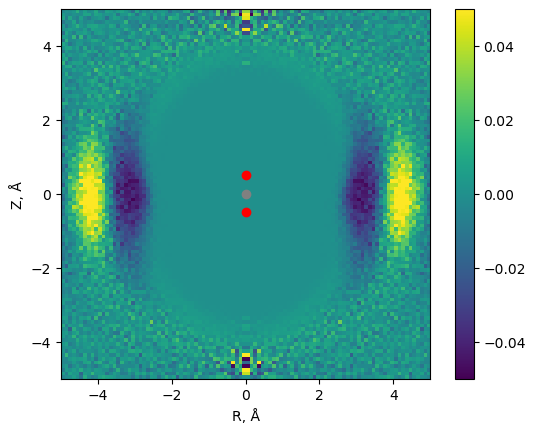

In [36]:
plt.imshow(intensity,origin='lower', vmin=-0.05, vmax=0.05,extent=[R.min(), R.max(), Z.min(), Z.max()])
plt.colorbar()
plt.xlabel(r'R, Å')
plt.ylabel(r'Z, Å')
plt.scatter(0, 0, color='grey')
plt.scatter(0,0.5,color='red')
plt.scatter(0,-0.5,color='red')

Plot contour plot

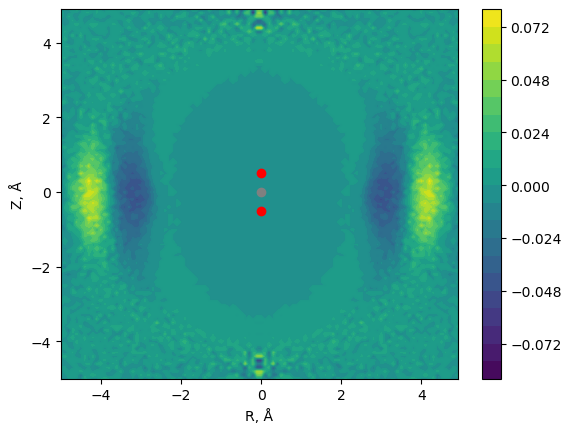

In [37]:
plt.contourf(np.arange(-R_Max,R_Max,delta_R), np.arange(Z_Min,Z_Max,delta_Z), intensity, levels=20, cmap='viridis')
colorbar = plt.colorbar()
plt.contour(np.arange(-R_Max,R_Max,delta_R), np.arange(Z_Min,Z_Max,delta_Z), intensity, levels=20,alpha=0.2)  # levels determine the number of contour lines
plt.xlabel(r'R, Å')
plt.ylabel(r'Z, Å')
plt.scatter(0, 0, color='grey')
plt.scatter(0,0.5,color='red')
plt.scatter(0,-0.5,color='red')